# Business Case Analysis: Unsupervised Learning

In this business case analysis I am using an online retail store dataset found in the [Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Online+Retail). The aim of this dataset is to identify models of purchases across the time. I will perform in this dataset:
- Artificial intelligence and natural language processing to identify category concepts given descriptions. Meaning identify the overall concept of a description given its content.
- Apply unsuperviser Learning to find groups of purchases.
- Apply ARIMA model to predict sells in a given period of time. 

In [35]:
import pandas as pd
from pandas import ExcelFile
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import itertools
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sys
from pandas.plotting import autocorrelation_plot
import warnings
import statsmodels.api as sm
import seaborn as sns

In [2]:
data_original = pd.read_csv('Online Retail.csv')

In [3]:
data_original

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09/12/2011 12:50,4.15,12680.0,France


# Descriptive Analytics

In [4]:
data_invoice = data_original[['InvoiceNo','Quantity','UnitPrice']]

In [5]:
# Get attributes per Invoice
grp_invoice = data_invoice.groupby(['InvoiceNo']).sum()

In [6]:
grp_invoice.columns = ['Quantity','UnitPrice']

* Quantity analysis

In [7]:
grp_invoice['Quantity']

InvoiceNo
536365        40
536366        12
536367        83
536368        15
536369         3
           ...  
C581484   -80995
C581490      -23
C581499       -1
C581568       -5
C581569       -6
Name: Quantity, Length: 25900, dtype: int64

In [17]:
#Invoice with the biggest amount of articles
grp_invoice['Quantity'].max()

80995

In [18]:
#Invoice with the less amount of articles
grp_invoice['Quantity'].min()

-80995

<AxesSubplot:>

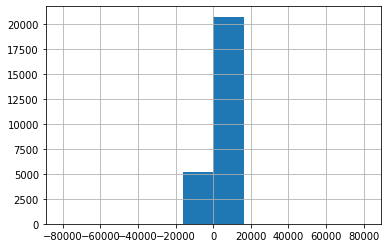

In [24]:
#Invoice quantity distribution, it seems to have a tendency of a normal distribution.
grp_invoice['Quantity'].hist()

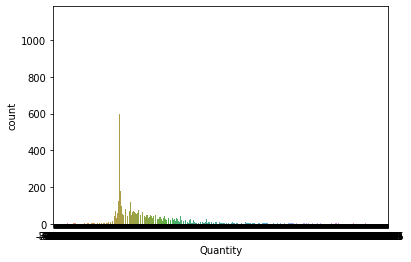

In [36]:
ax = sns.countplot(x="Quantity",data=grp_invoice)

In [45]:
#standard deviation
grp_invoice['Quantity'].std()

1108.5635509560302

In [46]:
#mean
grp_invoice['Quantity'].mean()

199.86293436293437

In [47]:
#median
grp_invoice['Quantity'].median()

100.0

In [48]:
#q1
grp_invoice['Quantity'].quantile(0.25)

6.0

In [49]:
#q3
grp_invoice['Quantity'].quantile(0.75)

240.0

In [50]:
#IQR 
grp_invoice['Quantity'].quantile(0.75) - grp_invoice['Quantity'].quantile(0.25)

234.0

* UnitPrice Analysis

In [52]:
grp_invoice['UnitPrice']

InvoiceNo
536365      27.37
536366       3.70
536367      58.24
536368      19.10
536369       5.95
            ...  
C581484      2.08
C581490      2.78
C581499    224.69
C581568     10.95
C581569      2.50
Name: UnitPrice, Length: 25900, dtype: float64

In [53]:
grp_invoice['UnitPrice'].min()

-11062.06

In [54]:
grp_invoice['UnitPrice'].max()

38970.0

<AxesSubplot:>

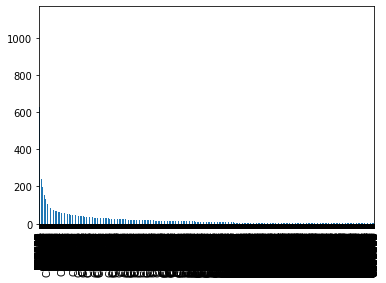

In [8]:
#Invoice frequency
#data_original['InvoiceNo'].plot.bar(rot = 0)
fig, ax = plt.subplots()
data_original['InvoiceNo'].value_counts().plot(ax=ax, kind='bar')

In [10]:
#max invoice with more products in the list
invoice_count.max()

1114

In [11]:
#min invoice with less products in the list
invoice_count.min()

1

In [38]:
#Invoice unit price max
grp_invoice['UnitPrice'].max()

38970.0

In [39]:
#Invoice unit price min
grp_invoice['UnitPrice'].min()

-11062.06

<AxesSubplot:>

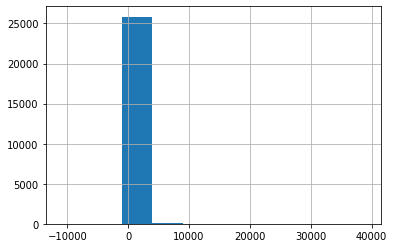

In [44]:
#Unit price this is an overall overview, I am conscious that I am not doing an exploration over each 
#sector/sales category seems to be a skewed distribution to the left.
grp_invoice['UnitPrice'].hist(bins = 10)

# Apply Natural Language Processing

For this kind of task, I am going to need to implement a bag of words algorithm with a clustering technique over my descriptions to check how well my cluster fill in categories. 

In [ ]:
#TODO ADD NLP

# Time Series

In this case I am going to do a small forecast over my series with the overall sales per month. I am going to forecast the next 3 months of sales.

In [ ]:
#Todo add the time series